function BACKTRACKING-SEARCH (CSP) returns a solution, or failure    
ASSIGNMENT = INIT-ASSIGN(CSP.VARIABLES)    
return BACKTRACK (ASSIGNMENT, CS
    P)
function BACKTRACK(ASSIGNMENT, CSP) returns a solution, or failu    re
if IS-COMPLETE (ASSIGNMENT) then return ASSIGNM    ENT
VAR ←SELECT-UNASSIGNED-VARIABLE(    CSP)
for each value in ORDER-DOMAIN-VALUES (VAR, ASSIGNMENT, CS        P) do
if IS-CONSISTENT(VALUE, ASSIGNMENT            ) then
add {VAR = VALUE} to ASS            IGNMENT
INFERENCES ←INFERENCE(CSP, VAR             , VALUE)
if INFERENCES ≠ fai                lure then
RESULT ←BACKTRACK (ASSIGN                MENT, CSP)
if RESULT ≠ f                    ailure then
r    eturn result
remove {VAR = VALUE} and INFERENCES from ASSIGNMENT
return failure

function INIT-ASSIGN(VARIABLES) returns assignment
create a list ASSIGNMENT with VARS, VALS
for e    ach V in VARAIBLES
ASSI    GNMENT.VARIABLE = V
ASSIGNMENT.VALUE = 
NIL
Return ASSIGNMENT
function IS-COMPLETE (ASSIGNMENT)     returns True or False
for a        ll ASSIGNMENT.VALUEs do
if any VAUE is NULL, return False
return True

function SELECT-UNASSIGN    ED-VARIABLE(CSP) ret    uns VAR
MIN_DOMAIN_SIZE = ∞
for each variable X in CSP w    ith ASSIGNMENT VALUE = NIL do
if ( X.DO    MAINSIZE &lt; MIN_DOMAIN_SIZE)
MIN-DOMAIN-VAR = X
return MIN-DOMAIN-VAR

funct    ion IS_CONSISTENT(ASSIGNMEN        T, CSP)
for each CONSTRAINT in CSP
if any pair of vars assignments in ASIGNME            NT are not satisfying th
e CONSTRAINT
return False
return True
function INFERENCE(CSP,     VAR , VALUE) returns failure or success
for each variable v of CSP with VALUE = NIL     and is in a constraint along with VAR do
Make the DOMAIN of V consistent with     the VALUE with respect to the         constraint
if (SIZEOF(DOMAIN of V) = 0 )
return failure
return success

# Without visualization

In [1]:
# Define the CSP class to represent the map coloring problem
class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables  # List of regions (variables)
        self.domains = domains      # Dictionary of possible colors for each region
        self.constraints = constraints  # Adjacency list of constraints (no two adjacent regions can have the same color)

# Function to initialize the assignment
def init_assign(variables):
    return {var: None for var in variables}

# Function to check if the assignment is complete (all regions are colored)
def is_complete(assignment):
    return all(assignment[var] is not None for var in assignment)

# Function to select the next unassigned variable (using Minimum Remaining Values heuristic)
def select_unassigned_variable(csp, assignment):
    unassigned_vars = [var for var in csp.variables if assignment[var] is None]
    return min(unassigned_vars, key=lambda var: len(csp.domains[var]))

# Function to check if assigning a color to a region is consistent with the constraints
def is_consistent(csp, assignment, var, value):
    for neighbor in csp.constraints[var]:
        if assignment[neighbor] == value:
            return False  # Adjacent regions can't have the same color
    return True

# Function to perform inferences (reduce the domain of neighbors based on the current assignment)
def inference(csp, var, value, assignment):
    inferences = {}
    for neighbor in csp.constraints[var]:
        if assignment[neighbor] is None:
            # Make domain of neighbor consistent with the assignment of the current variable
            if value in csp.domains[neighbor]:
                csp.domains[neighbor].remove(value)
            if len(csp.domains[neighbor]) == 0:
                return None  # Failure if domain becomes empty
            inferences[neighbor] = csp.domains[neighbor]
    return inferences

# Recursive backtracking algorithm
def backtrack(assignment, csp):
    if is_complete(assignment):
        return assignment  # Return the complete solution if successful

    # Select the next unassigned variable
    var = select_unassigned_variable(csp, assignment)

    # Try each value in the domain of the selected variable
    for value in csp.domains[var]:
        if is_consistent(csp, assignment, var, value):
            assignment[var] = value  # Assign the value to the variable
            inferences = inference(csp, var, value, assignment)
            if inferences is not None:
                result = backtrack(assignment, csp)  # Recursively solve the remaining CSP
                if result is not None:
                    return result  # Return result if successful

            # Backtrack (remove the assignment and undo inferences)
            assignment[var] = None

    return None  # Failure

# Function to start the backtracking search
def backtracking_search(csp):
    assignment = init_assign(csp.variables)
    return backtrack(assignment, csp)

# Sample input (Map of Australia from the image)
# Regions (variables)
variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']

# Domains (possible colors for each region)
domains = {
    'WA': ['Red', 'Green', 'Blue'],
    'NT': ['Red', 'Green', 'Blue'],
    'SA': ['Red', 'Green', 'Blue'],
    'Q': ['Red', 'Green', 'Blue'],
    'NSW': ['Red', 'Green', 'Blue'],
    'V': ['Red', 'Green', 'Blue'],
    'T': ['Red', 'Green', 'Blue']
}

# Constraints (adjacency list based on the map of Australia)
constraints = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []  # Tasmania (T) is isolated and does not share borders with other regions
}

# Create the CSP instance
csp = CSP(variables, domains, constraints)

# Solve the map coloring problem
solution = backtracking_search(csp)

# Print the solution
if solution:
    print("Solution found:")
    print(solution)
else:
    print("No solution found.")


Solution found:
{'WA': 'Red', 'NT': 'Green', 'SA': 'Blue', 'Q': 'Red', 'NSW': 'Green', 'V': 'Red', 'T': 'Red'}


# With visualization

Solution found:
{'WA': 'Red', 'NT': 'Green', 'SA': 'Blue', 'Q': 'Red', 'NSW': 'Green', 'V': 'Red', 'T': 'Red'}


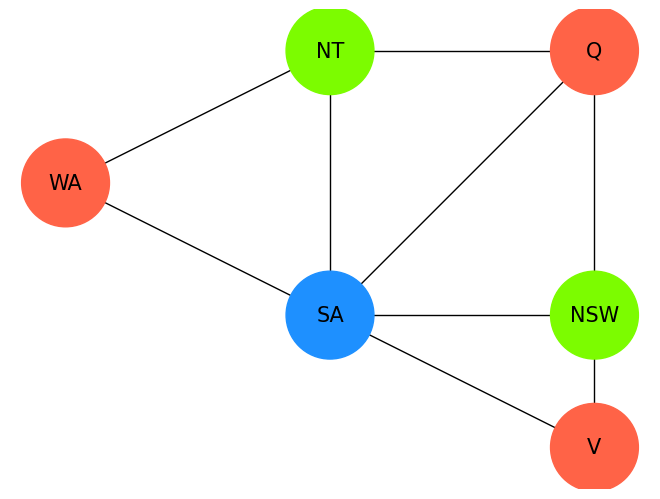

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the CSP class to represent the map coloring problem
class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables  # List of regions (variables)
        self.domains = domains      # Dictionary of possible colors for each region
        self.constraints = constraints  # Adjacency list of constraints (no two adjacent regions can have the same color)

# Function to initialize the assignment
def init_assign(variables):
    return {var: None for var in variables}

# Function to check if the assignment is complete (all regions are colored)
def is_complete(assignment):
    return all(assignment[var] is not None for var in assignment)

# Function to select the next unassigned variable (using Minimum Remaining Values heuristic)
def select_unassigned_variable(csp, assignment):
    unassigned_vars = [var for var in csp.variables if assignment[var] is None]
    return min(unassigned_vars, key=lambda var: len(csp.domains[var]))

# Function to check if assigning a color to a region is consistent with the constraints
def is_consistent(csp, assignment, var, value):
    for neighbor in csp.constraints[var]:
        if assignment[neighbor] == value:
            return False  # Adjacent regions can't have the same color
    return True

# Function to perform inferences (reduce the domain of neighbors based on the current assignment)
def inference(csp, var, value, assignment):
    inferences = {}
    for neighbor in csp.constraints[var]:
        if assignment[neighbor] is None:
            # Make domain of neighbor consistent with the assignment of the current variable
            if value in csp.domains[neighbor]:
                csp.domains[neighbor].remove(value)
            if len(csp.domains[neighbor]) == 0:
                return None  # Failure if domain becomes empty
            inferences[neighbor] = csp.domains[neighbor]
    return inferences

# Recursive backtracking algorithm
def backtrack(assignment, csp):
    if is_complete(assignment):
        return assignment  # Return the complete solution if successful

    # Select the next unassigned variable
    var = select_unassigned_variable(csp, assignment)

    # Try each value in the domain of the selected variable
    for value in csp.domains[var]:
        if is_consistent(csp, assignment, var, value):
            assignment[var] = value  # Assign the value to the variable
            inferences = inference(csp, var, value, assignment)
            if inferences is not None:
                result = backtrack(assignment, csp)  # Recursively solve the remaining CSP
                if result is not None:
                    return result  # Return result if successful

            # Backtrack (remove the assignment and undo inferences)
            assignment[var] = None

    return None  # Failure

# Function to start the backtracking search
def backtracking_search(csp):
    assignment = init_assign(csp.variables)
    return backtrack(assignment, csp)

# Function to visualize the solution on a map
def visualize_map(solution):
    # Create a graph
    G = nx.Graph()

    # Add edges between regions (adjacency relationships)
    edges = [
        ('WA', 'NT'), ('WA', 'SA'), ('NT', 'SA'), ('NT', 'Q'),
        ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'),
        ('Q', 'NSW'), ('NSW', 'V')
    ]
    
    G.add_edges_from(edges)
    
    # Positions of the nodes (for visualization)
    pos = {
        'WA': (0, 3), 'NT': (1, 4), 'SA': (1, 2), 'Q': (2, 4), 
        'NSW': (2, 2), 'V': (2, 1), 'T': (1.5, 0)
    }

    # Color map based on the solution
    color_map = []
    colors = {
        'Red': '#FF6347', 'Green': '#7CFC00', 'Blue': '#1E90FF',
        'Yellow': '#FFD700', 'Cyan': '#00FFFF', 'Orange': '#FFA500', 'Pink': '#FF69B4'
    }
    
    for node in G:
        color_map.append(colors[solution[node]])

    # Draw the graph
    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=4000, font_size=15, font_color='black')
    plt.show()

# Sample input (Map of Australia from the image)
# Regions (variables)
variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']

# Domains (possible colors for each region)
domains = {
    'WA': ['Red', 'Green', 'Blue'],
    'NT': ['Red', 'Green', 'Blue'],
    'SA': ['Red', 'Green', 'Blue'],
    'Q': ['Red', 'Green', 'Blue'],
    'NSW': ['Red', 'Green', 'Blue'],
    'V': ['Red', 'Green', 'Blue'],
    'T': ['Red', 'Green', 'Blue']
}

# Constraints (adjacency list based on the map of Australia)
constraints = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []  # Tasmania (T) is isolated and does not share borders with other regions
}

# Create the CSP instance
csp = CSP(variables, domains, constraints)

# Solve the map coloring problem
solution = backtracking_search(csp)

# Print the solution
if solution:
    print("Solution found:")
    print(solution)
    visualize_map(solution)  # Visualize the solution on the map
else:
    print("No solution found.")
